# Markovian Model for steady-state throughput CUBIC and Hybla
Based on the paper by Bao Wong and Leung.

* First we try to just compute different stationnary distributions for CUBIC for different parameters. 
* Then we shall do the same with Hybla. 
* Then we can do the concatenation.

Along the way, we noticed that the model is not very realistic as it assumes a time based error model. However, errors are dependent on the number of packets sent. This is why we propose a new model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_OG

#plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)

Average throughput is 0.8122841259723813


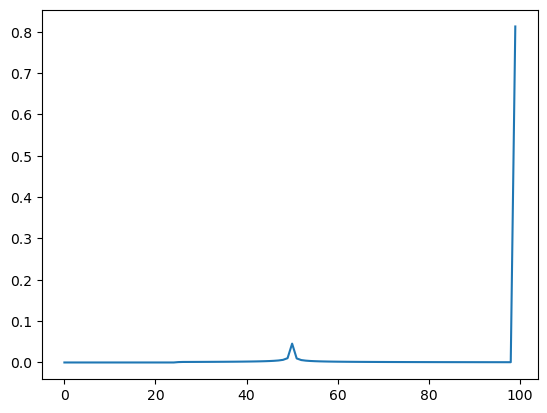

In [2]:
wired = CCA_MarkovChain_CUBIC_OG(err_rate=0.05,beta=0.5,alpha=1,N=100,C =1000)
wired.avg_throughput()
print(f"Average throughput is {wired.x}")
plt.plot(np.arange(wired.N),wired.P[50,:])
# plt.title(r"Transition probabilities from state $a_{50}$")
# plt.ylabel(r"$P_{50,x}$")
# plt.xlabel(r"$a_x$")

1.0


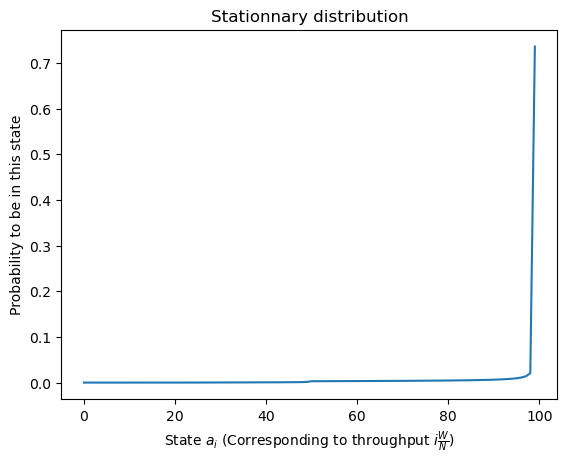

In [6]:
# Plot stationnary distribution
plt.plot(np.arange(wired.N),wired.pi)
plt.title(r"Stationnary distribution")
plt.xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
plt.ylabel(r'Probability to be in this state')
print(np.sum(wired.pi))

Text(0, 0.5, 'Normalised throughput')

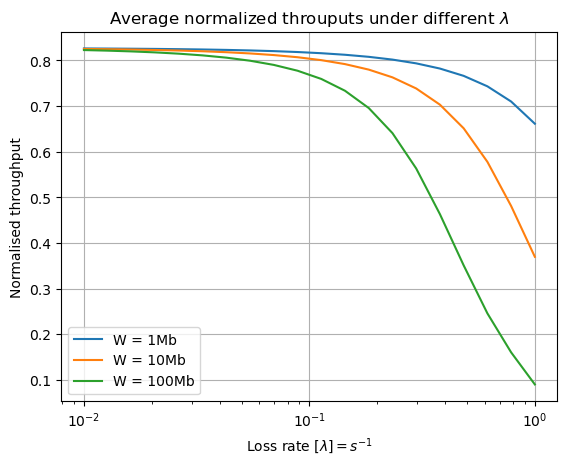

In [7]:
# Fig 7.

err_rates = np.logspace(-2,0,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = C ,RTT=0.1)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(err_rates,throughputs[0,:], label = "W = 1Mb")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Average normalized throuputs under different $\lambda$")
plt.xlabel(r"Loss rate $[\lambda] = s^{-1}$")
plt.ylabel(r'Normalised throughput')

Text(0, 0.5, 'Normalised throughput')

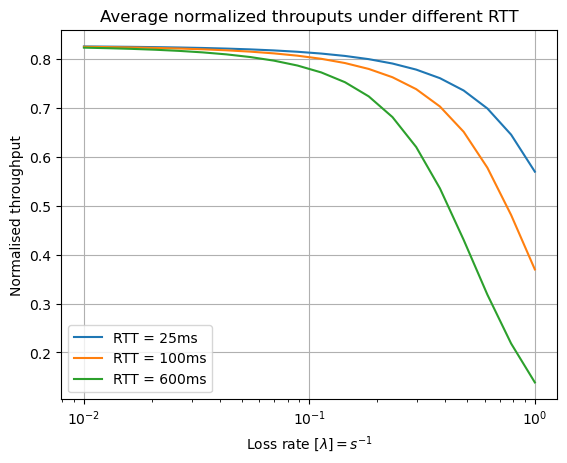

In [8]:
# Fig 7.

err_rates = np.logspace(-2,0,20)
throughputs = np.zeros([3,len(err_rates)])
for k,RTT in enumerate([0.025,0.1,0.6]):
    for i, l in enumerate(err_rates):
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = 100,RTT=RTT)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(err_rates,throughputs[0,:], label = "RTT = 25ms")
plt.plot(err_rates,throughputs[1,:], label = "RTT = 100ms")
plt.plot(err_rates,throughputs[2,:], label = "RTT = 600ms")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Average normalized throuputs under different RTT")
plt.xlabel(r"Loss rate $[\lambda] = s^{-1}$")
plt.ylabel(r'Normalised throughput')

Text(0, 0.5, 'Normalised throughput')

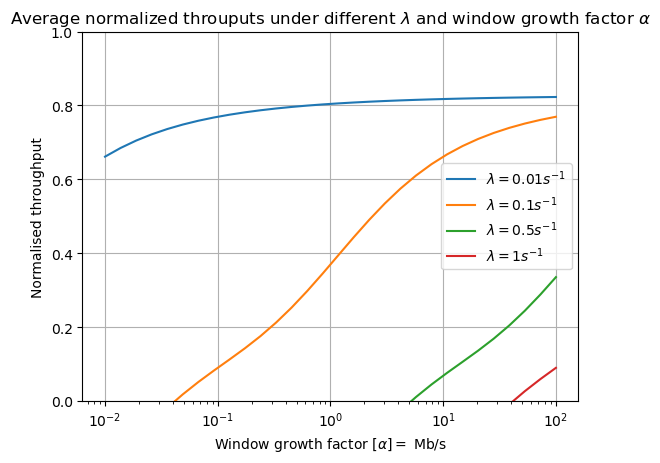

In [10]:
# Fig. 8 

alphas = np.logspace(-2,2,30)
throughputs = np.zeros([4,len(alphas)])
for k,lam in enumerate([0.01,0.1,0.5,1]):
    for i, alpha in enumerate(alphas):
        wired = CCA_CUBIC_MarkovChain(trans_err=lam,beta=0.5,alpha=alpha,N=100,C=100,RTT=100)
        throughputs[k,i] = wired.avg_throughput()

plt.plot(alphas,throughputs[0,:], label = r"$\lambda = 0.01 s^{-1}$")
plt.plot(alphas,throughputs[1,:], label = r"$\lambda = 0.1 s^{-1}$")
plt.plot(alphas,throughputs[2,:], label = r"$\lambda = 0.5 s^{-1}$")
plt.plot(alphas,throughputs[3,:], label = r"$\lambda = 1 s^{-1}$")
plt.semilogx()
plt.legend()
plt.ylim([0,1])
plt.grid()
plt.title(r"Average normalized throuputs under different $\lambda$ and window growth factor $\alpha$")
plt.xlabel(r"Window growth factor $[\alpha] =$ Mb/s")
plt.ylabel(r'Normalised throughput')

In [11]:
fast = CCA_CUBIC_MarkovChain(trans_err=0.5,beta=0.5,alpha=1,N=100,C =100,RTT=0.025)
slow = CCA_CUBIC_MarkovChain(trans_err=0.5,beta=0.5,alpha=1,N=100,C =100,RTT=0.1)
print(fast.avg_throughput())
print(slow.avg_throughput())
print(fast.tau[99,99])
print(slow.tau[99,99])


0.7315465066033302
0.6425237057388398
0.783017208342889
1.242962340232705


In [13]:
wireless = CCA_Hybla_MarkovChain(trans_err=0.1,beta=0.5,alpha=1,N=100,C = 1000, RTT = 0.5, RTT0=0.025)
print(wireless.avg_throughput())
wired = CCA_CUBIC_MarkovChain(trans_err=0.1,beta=0.5,alpha=1,N=100,C =1000,RTT=0.5)
print(wired.avg_throughput())

0.4085971799296745
0.7081852900931365


Average throughput is 0.44660443690398643


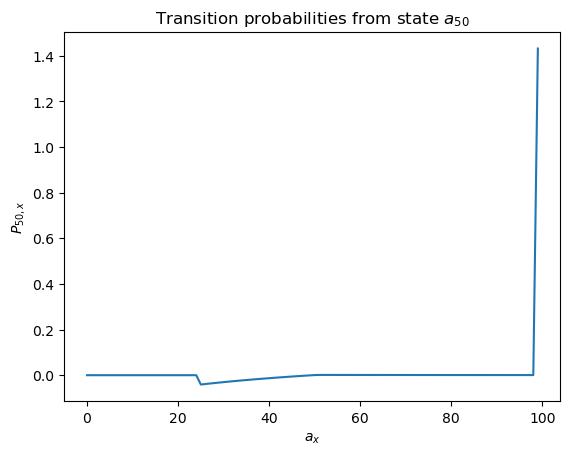

In [14]:
wireless = CCA_Hybla_MarkovChain(trans_err=10000,packet_err=0.01,beta=0.5,alpha=1,N=100,C = 10, RTT = 0.5, RTT0=0.025, new=True)
wireless.avg_throughput()
print(f"Average throughput is {wireless.x}")
plt.plot(np.arange(wireless.N),wireless.P[50,:])
plt.title(r"Transition probabilities from state $a_{50}$")
plt.ylabel(r"$P_{50,x}$")
plt.xlabel(r"$a_x$")
plt.show()

1.0


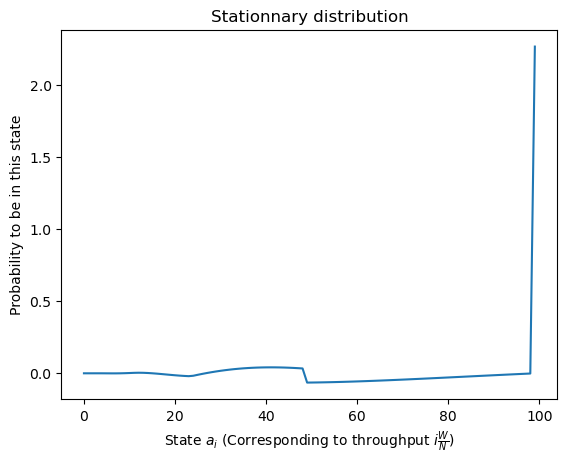

In [15]:
plt.plot(np.arange(wireless.N),wireless.pi)
plt.title(r"Stationnary distribution")
plt.xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
plt.ylabel(r'Probability to be in this state')
print(np.sum(wireless.pi))

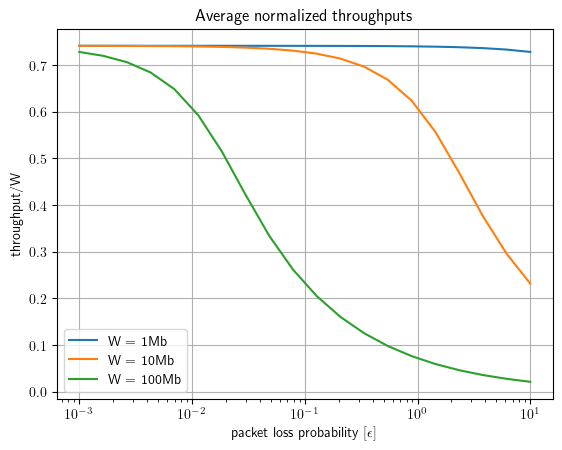

In [51]:
err_rates = np.logspace(-3,1,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wireless = CCA_Hybla_MarkovChain(packet_err=l,beta=0.5,alpha=1,N=100,C = C,RTT=0.5, RTT0=0.025)
        throughputs[k,i] = wireless.avg_throughput()



plt.plot(err_rates,throughputs[0,:], label = "W = 1Mb")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"Average normalized throughputs")
plt.xlabel(r"packet loss probability $[\epsilon]$")
plt.ylabel(r'throughput/W')
plt.show()

In [34]:
err_rates = np.logspace(-2,0,20)
throughputs_hybla_bandwidth = np.zeros([3,len(err_rates)])
throughputs_cubic_bandwidth = np.zeros([3,len(err_rates)])
throughputs_hybla_rtt = np.zeros([3,len(err_rates)])
throughputs_cubic_rtt = np.zeros([3,len(err_rates)])

for k,C in enumerate([10,100,1000]):
    for i, l in enumerate(err_rates):
        wireless = CCA_Hybla_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100, C = C, RTT=0.1, RTT0=0.025)
        throughputs_hybla_bandwidth[k,i] = wireless.avg_throughput()
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = C, RTT = 0.1)
        throughputs_cubic_bandwidth[k,i] = wired.avg_throughput()

for k,R in enumerate([0.025,0.1,0.6]):
    for i,l in enumerate(err_rates):
        wireless = CCA_Hybla_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100, C = 100, RTT=R, RTT0=0.025)
        throughputs_hybla_rtt[k,i] = wireless.avg_throughput()
        wired = CCA_CUBIC_MarkovChain(trans_err=l,beta=0.5,alpha=1,N=100,C = 100, RTT = R)
        throughputs_cubic_rtt[k,i] = wired.avg_throughput()

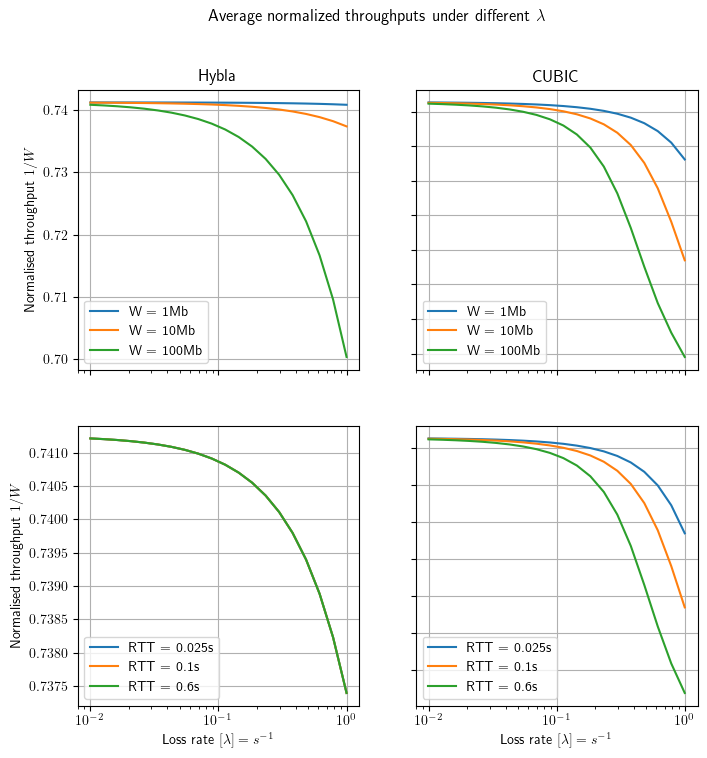

In [40]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Average normalized throughputs under different $\lambda$")
fig.set_figheight(8)
fig.set_figwidth(8)

axs[0, 0].plot(err_rates, throughputs_hybla_bandwidth[0,:],label = "W = 1Mb")
axs[0,0].plot(err_rates,throughputs_hybla_bandwidth[1,:], label = "W = 10Mb")
axs[0,0].plot(err_rates,throughputs_hybla_bandwidth[2,:], label = "W = 100Mb")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla")

axs[0,1].plot(err_rates, throughputs_cubic_bandwidth[0,:],label = "W = 1Mb")
axs[0,1].plot(err_rates,throughputs_cubic_bandwidth[1,:], label = "W = 10Mb")
axs[0,1].plot(err_rates,throughputs_cubic_bandwidth[2,:], label = "W = 100Mb")
axs[0,1].semilogx()
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC")

axs[1,0].plot(err_rates, throughputs_hybla_rtt[0,:],label = "RTT = 0.025s")
axs[1,0].plot(err_rates,throughputs_hybla_rtt[1,:], label = "RTT = 0.1s")
axs[1,0].plot(err_rates,throughputs_hybla_rtt[2,:], label = "RTT = 0.6s")
axs[1,0].semilogx()
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].plot(err_rates, throughputs_cubic_rtt[0,:],label = "RTT = 0.025s")
axs[1,1].plot(err_rates,throughputs_cubic_rtt[1,:], label = "RTT = 0.1s")
axs[1,1].plot(err_rates,throughputs_cubic_rtt[2,:], label = "RTT = 0.6s")
axs[1,1].semilogx()
axs[1,1].legend()
axs[1,1].grid()

for ax in axs.flat:
    ax.set(xlabel=r"Loss rate $[\lambda] = s^{-1}$", ylabel=r'Normalised throughput $1/W$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [17]:
plain = CCA_CUBIC_MarkovChain_new(N=100, C=1000, distribution="bernoulli", RTT_real=0.2,RTT_est=0.2)

print(plain.transition_proba_CUBIC(1,10))

0.0011468745040508295


1.0


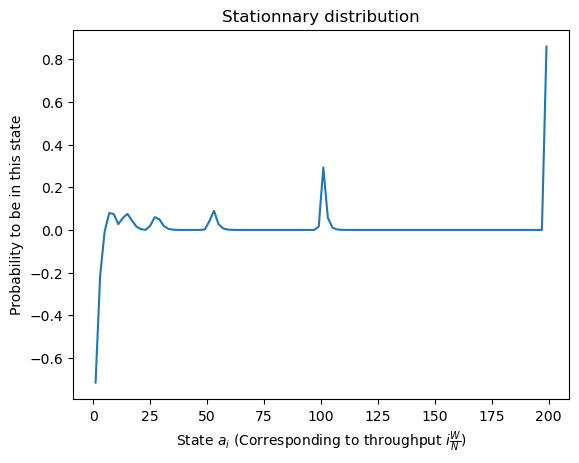

In [18]:
plain.compute_stationnary_distribution()

plt.plot(plain.a,plain.pi)
plt.title(r"Stationnary distribution")
plt.xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
plt.ylabel(r'Probability to be in this state')
print(np.sum(plain.pi))

Stationnary distribution


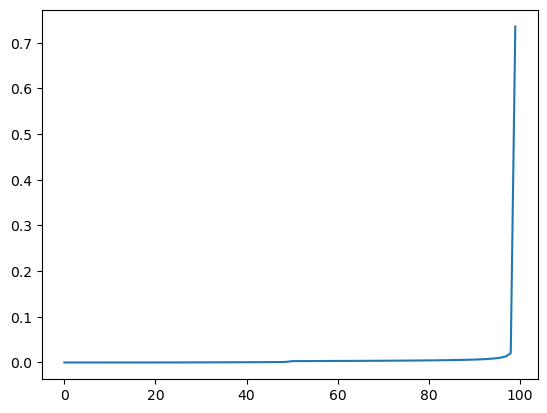

In [2]:
wired = CCA_CUBIC_MarkovChain_OG(trans_err=0.05,beta=0.5,alpha=1,N=100,C =1000,RTT=0.5)
wired.compute_stationnary_distribution()
print(f"Stationnary distribution")
plt.plot(np.arange(wired.N),wired.pi)

Stationnary distribution


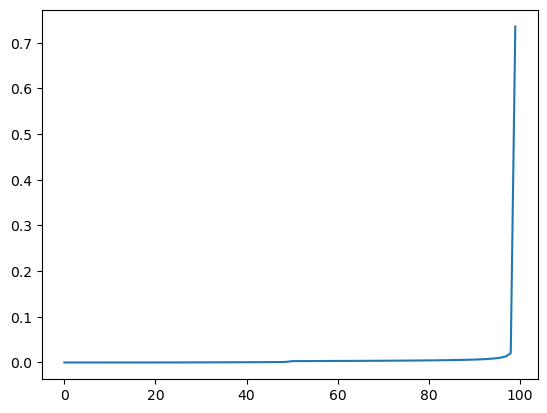

In [2]:
wired = CCA_CUBIC_MarkovChain_OG(trans_err=0.05,beta=0.5,alpha=1,N=100,C =1000,RTT=0.5)
wired.compute_stationnary_distribution()
print(f"Stationnary distribution")
plt.plot(np.arange(wired.N),wired.pi)